# **Question:1**

In [2]:
#mount my google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load training and test data
train_data = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/LAB 01/train.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/LAB 01/test.csv")

# Check first few rows
print(train_data.head())

# Split into features (X) and target (y)
X_train = train_data[['Income']].values  # Independent variable
y_train = train_data['Balance'].values   # Dependent variable

X_test = test_data[['Income']].values
y_test = test_data['Balance'].values


     Income   Balance
0  0.550798  5.651202
1  0.708148  7.321263
2  0.290905  5.167304
3  0.510828  5.609367
4  0.892947  9.406379


In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
def train_and_evaluate(neurons):
    # Build the neural network model
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(1,)),  # Hidden layer
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Measure training time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train, epochs=500, batch_size=16, verbose=0)  # Silent training

    # Record training time
    training_time = time.time() - start_time

    # Predictions
    y_pred = model.predict(X_test).flatten()

    # Compute evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"\nHidden Neurons: {neurons}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R² Score: {r2:.4f}")
    return neurons, training_time, rmse, mae, mape, r2, y_pred


In [6]:
results = []
predictions = {}

for neurons in [16, 32, 64, 128, 256]:
    neurons, time_taken, rmse, mae, mape, r2, y_pred = train_and_evaluate(neurons)
    results.append((neurons, time_taken, rmse, mae, mape, r2))
    predictions[neurons] = y_pred  # Store predictions for plotting


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Hidden Neurons: 16
Training Time: 34.9907 seconds
RMSE: 1.5517
MAE: 1.4027
MAPE: 24.14%
R² Score: 0.4894


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Hidden Neurons: 32
Training Time: 28.9065 seconds
RMSE: 0.7395
MAE: 0.6867
MAPE: 11.34%
R² Score: 0.8840


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

Hidden Neurons: 64
Training Time: 28.2594 seconds
RMSE: 0.4283
MAE: 0.3615
MAPE: 6.03%
R² Score: 0.9611


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Hidden Neurons: 128
Training Time: 29.7545 seconds
RMSE: 0.4771
MAE: 0.4016
MAPE: 6.74%
R² Score: 0.9517


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Hidden Neurons: 256
Training Time: 28.8654 seconds
RMSE: 0.3975
MAE: 0.3450
MAPE: 5.90%
R² Score: 0.9665


In [7]:
results_df = pd.DataFrame(results, columns=["Neurons", "Training Time (s)", "RMSE", "MAE", "MAPE (%)", "R²"])
print("\nFinal Results:\n", results_df)



Final Results:
    Neurons  Training Time (s)      RMSE       MAE   MAPE (%)        R²
0       16          34.990696  1.551689  1.402727  24.144131  0.489413
1       32          28.906455  0.739537  0.686698  11.340800  0.884021
2       64          28.259402  0.428262  0.361524   6.034535  0.961106
3      128          29.754493  0.477080  0.401619   6.736122  0.951734
4      256          28.865363  0.397542  0.345035   5.904021  0.966486


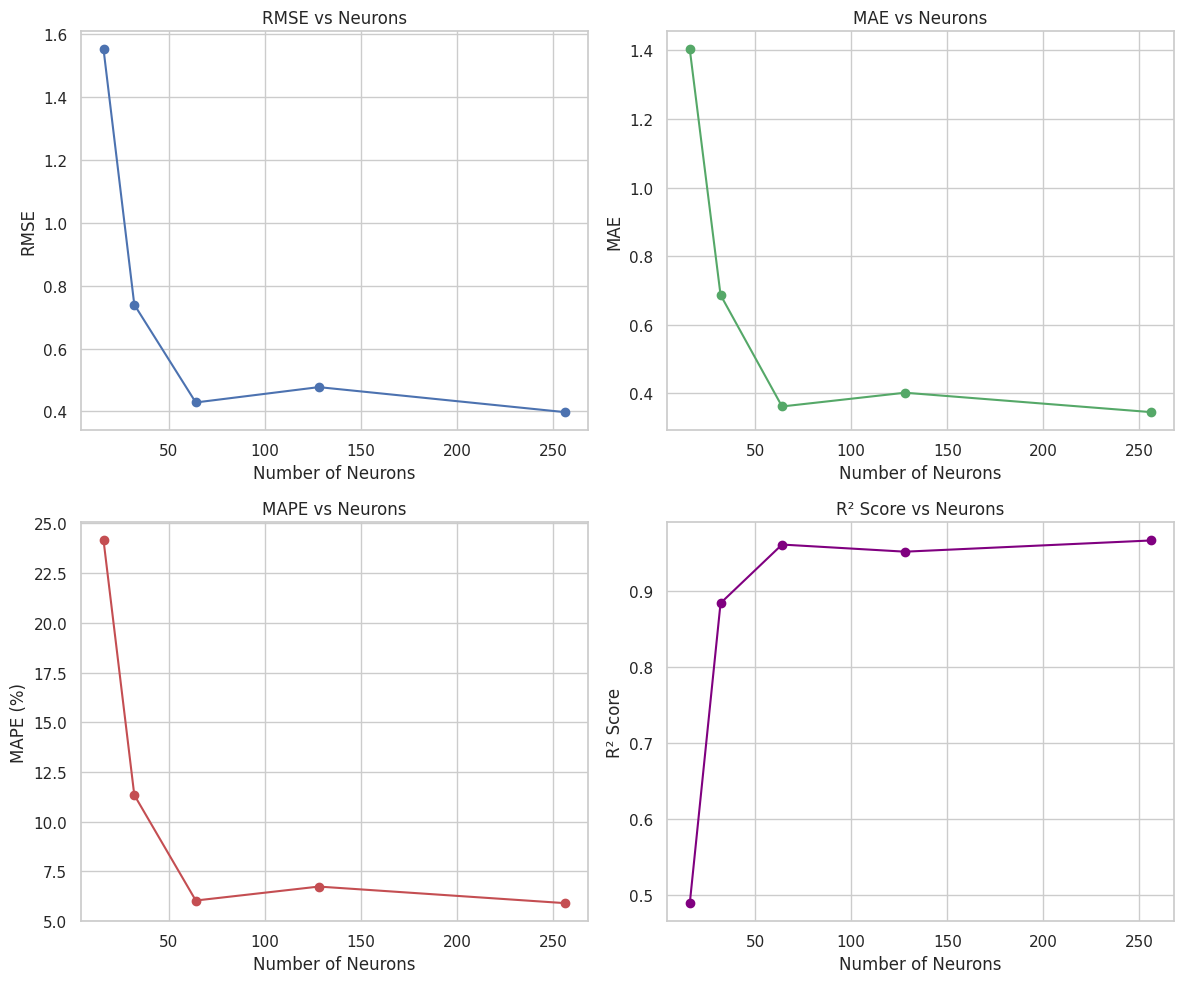

In [8]:
# Extract values
neurons = results_df["Neurons"]
training_time = results_df["Training Time (s)"]
rmse = results_df["RMSE"]
mae = results_df["MAE"]
mape = results_df["MAPE (%)"]
r2 = results_df["R²"]

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot RMSE
axes[0, 0].plot(neurons, rmse, marker="o", linestyle="-", color="b")
axes[0, 0].set_title("RMSE vs Neurons")
axes[0, 0].set_xlabel("Number of Neurons")
axes[0, 0].set_ylabel("RMSE")

# Plot MAE
axes[0, 1].plot(neurons, mae, marker="o", linestyle="-", color="g")
axes[0, 1].set_title("MAE vs Neurons")
axes[0, 1].set_xlabel("Number of Neurons")
axes[0, 1].set_ylabel("MAE")

# Plot MAPE
axes[1, 0].plot(neurons, mape, marker="o", linestyle="-", color="r")
axes[1, 0].set_title("MAPE vs Neurons")
axes[1, 0].set_xlabel("Number of Neurons")
axes[1, 0].set_ylabel("MAPE (%)")

# Plot R² Score
axes[1, 1].plot(neurons, r2, marker="o", linestyle="-", color="purple")
axes[1, 1].set_title("R² Score vs Neurons")
axes[1, 1].set_xlabel("Number of Neurons")
axes[1, 1].set_ylabel("R² Score")

plt.tight_layout()
plt.show()


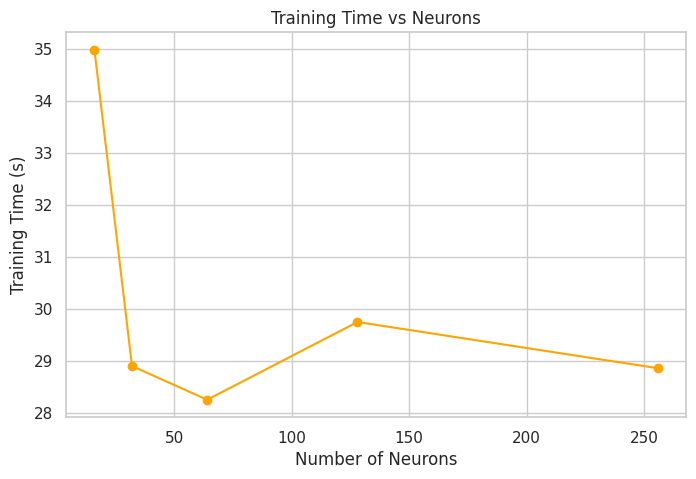

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(neurons, training_time, marker="o", linestyle="-", color="orange")
plt.title("Training Time vs Neurons")
plt.xlabel("Number of Neurons")
plt.ylabel("Training Time (s)")
plt.grid(True)
plt.show()


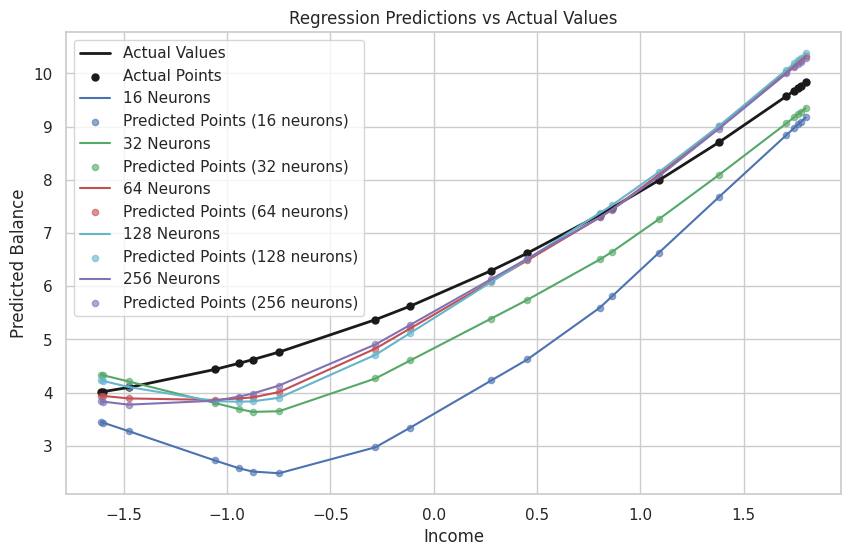

In [10]:
# Define colors for predicted values
colors = ['b', 'g', 'r', 'c', 'm']

# Sort X_test and corresponding predictions for a smooth line plot
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test.flatten()[sorted_indices]
y_test_sorted = y_test[sorted_indices]  # Sort y_test for consistency

plt.figure(figsize=(10, 6))

# Plot actual values as a line
plt.plot(X_test_sorted, y_test_sorted, 'k-', label="Actual Values", linewidth=2)

# Mark the actual data points
plt.scatter(X_test_sorted, y_test_sorted, color='k', marker='.', s=100, label="Actual Points")

# Plot predicted values for different neuron configurations
for i, neurons in enumerate([16, 32, 64, 128, 256]):
    y_pred_sorted = predictions[neurons][sorted_indices]  # Sort predictions
    plt.plot(X_test_sorted, y_pred_sorted, label=f"{neurons} Neurons", color=colors[i], linestyle='-')

    # Mark the predicted data points
    plt.scatter(X_test_sorted, y_pred_sorted, color=colors[i], marker='.', s=80, alpha=0.6, label=f"Predicted Points ({neurons} neurons)")

# Labels and title
plt.xlabel("Income")
plt.ylabel("Predicted Balance")
plt.title("Regression Predictions vs Actual Values")
plt.legend()
plt.grid(True)
plt.show()


### **Observation**  

This experiment explores how varying the number of neurons (16, 32, 64, 128, and 256) in a **single hidden layer** neural network impacts its performance in a regression task. The model's effectiveness is assessed using key performance metrics: **Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R² score**. Additionally, training times are recorded to analyze computational efficiency. Scatter plots are generated to visualize the relationship between the input feature (**income**) and the target variable (**balance**), along with the corresponding regression predictions.  

---

### **Key Insights**  

#### 🔹 **Effect of Hidden Layer Size:**  
- Comparing the performance metrics across different neuron counts in the hidden layer reveals the impact of **network complexity** on prediction accuracy.  
- Increasing the number of neurons generally **improves accuracy up to a certain point**—beyond which, adding more neurons may **lead to overfitting**.  
- The results highlight the trade-off between **model complexity and performance**.  

#### 🔹 **Evaluation Metrics:**  
- **RMSE, MAE, and MAPE** measure error magnitudes, helping assess how well the model predicts the target variable.  
- **R² score** indicates how much variance in the target variable is explained by the model.  
- **Higher R² values** suggest a better-fitting model, whereas **lower RMSE, MAE, and MAPE** indicate more accurate predictions.  

#### 🔹 **Computational Cost:**  
- Training time increases as **neuron count rises**, demonstrating the computational burden of larger models.  
- Finding the **optimal number of neurons** is crucial to balance **efficiency** and **accuracy**.  

#### 🔹 **Visualization with Scatter Plots:**  
- Scatter plots illustrate how well the predicted regression line fits the actual data points.  
- These plots help identify **outliers** and areas where the model may struggle to generalize.  

---

### **Further Exploration**  
🔹 Investigate whether performance gains **diminish** as the number of neurons increases.  
🔹 Experiment with **additional hidden layers** and **alternative activation functions** to optimize the model further.  


# **Question:2**

In [18]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/APPLIED FORECASTING ALGORTHIMS/LAB 01/housing.csv')

In [19]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [21]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
result = pd.DataFrame(columns=['Layers', 'MSE', 'MAE', 'MAPE', 'R2_score'])

number_of_layers = [1,2,3,5,8]
for layers in number_of_layers:
  model = Sequential()

  for i in range(layers):
    model.add(Dense(256, activation='relu', input_dim=3))
  model.add(Dense(1, activation='linear'))

  model.summary()
  model.compile(optimizer='adam', loss='mean_squared_error')

  model.fit(X_train, y_train, epochs=50, verbose=0, batch_size=64)

  y_pred = model.predict(X_test).flatten()

  # rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
  r2 = r2_score(y_test, y_pred)


  result = pd.concat([result, pd.DataFrame([[layers, mse, mae, mape, r2]], columns=['Layers', 'MSE', 'MAE', 'MAPE', 'R2_score'])], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_73 (Dense)                     │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,281 (5.00 KB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


<ipython-input-33-65bd44f145d4>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame([[layers, mse, mae, mape, r2]], columns=['Layers', 'MSE', 'MAE', 'MAPE', 'R2_score'])], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                     │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,073 (262.00 KB)

 Trainable params: 67,073 (262.00 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,865 (519.00 KB)

 Trainable params: 132,865 (519.00 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_85 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,449 (1.01 MB)

 Trainable params: 264,449 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                     │ (None, 256)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_92 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461,825 (1.76 MB)

 Trainable params: 461,825 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


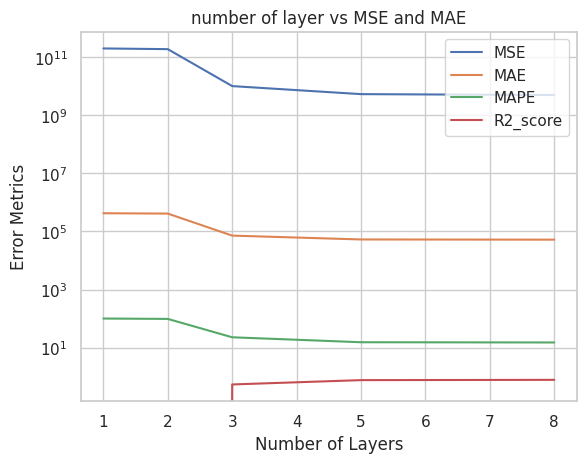

In [34]:
plt.plot(result['Layers'], result['MSE'], label='MSE')
plt.plot(result['Layers'], result['MAE'], label='MAE')
plt.plot(result['Layers'], result['MAPE'], label='MAPE')
plt.plot(result['Layers'], result['R2_score'], label='R2_score')
plt.title('number of layer vs MSE and MAE')
plt.xlabel('Number of Layers')
plt.ylabel('Error Metrics')
plt.yscale('log')
plt.legend()
plt.show()

### **Conclusion**

This analysis explores how the number of hidden layers in a neural network affects its ability to predict Boston housing prices. By evaluating models with different layer counts (1, 2, 3, 5, and 8), we assess how increasing network complexity influences prediction accuracy. The results highlight a trade-off between model complexity and performance, measured using Mean Squared Error (MSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and R² score.

---

### **Key Observations**  

#### 🔹 **Effect of Layer Count:**  
- Increasing the number of layers from **1 to 2** improves model accuracy, reducing errors (MSE, MAE, and MAPE) and increasing the **R² score**.  
- However, further increasing layers beyond a certain point (**5 and 8 layers**) does not significantly enhance performance and may slightly increase error, suggesting **diminishing returns** or **overfitting**.  

#### 🔹 **Use of Log Scale:**  
- The y-axis is displayed in **log scale** to help visualize subtle differences in error metrics more effectively.  

#### 🔹 **Analysis of Metrics:**  
- **MSE (Mean Squared Error):** Measures the average squared difference between predicted and actual values, helping identify large errors.  
- **MAE (Mean Absolute Error):** Represents the average absolute difference between predictions and actual values, providing an intuitive error measure.  
- **MAPE (Mean Absolute Percentage Error):** Expresses error as a percentage of actual values, offering insight into **relative** prediction accuracy.  
- **R² Score:** Indicates how well the model explains variability in the target variable. With values between **0.7 and 0.8**, the model explains **70-80%** of the variance in housing prices.  

#### 🔹 **Balancing Complexity and Performance:**  
- Simply increasing the number of layers does **not always** improve predictive accuracy.  
- There is an **optimal number of layers** beyond which adding more layers leads to minimal improvements or even worse performance.  

#### 🔹 **Potential Overfitting:**  
- The slight increase in errors for **5 and 8-layer** models suggests potential **overfitting**.  
- While deeper networks can capture more patterns, they may also learn **noise** from the training data, reducing **generalization** to unseen data.  

---

### **Final Thoughts**  
This study demonstrates that **more layers do not always lead to better performance**. Instead, optimizing the network architecture is crucial for achieving a balance between **complexity** and **prediction accuracy**.
